# <center> **<u>Scikit-Learn: Supervised Learning</u>**  </center>
<br><br>
<figure style="text-align: center;">
    <img src="notebook_images/scikit-learn_supervised_learning/supervised_learning.jpg" alt="Supervised Learning">
</figure>

---

#### All Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import root_mean_squared_error


# **1. Classification**

---

# **2. Regression**

---

### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---

In [11]:
sales_adver_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/advertising_and_sales_clean.csv')
sales_adver_df.drop('influencer', axis=1, inplace=True)

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

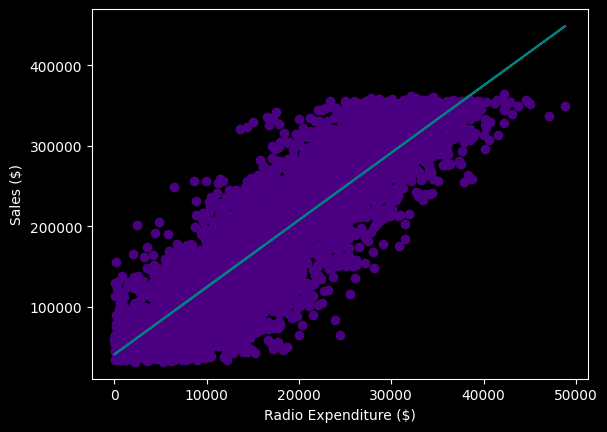

In [7]:
# scikit-learn imports used here
from sklearn.linear_model import LinearRegression

# assign `radio` column's values: X
X = sales_adver_df['radio'].values
# assign `sales` column values: y
y =sales_adver_df['sales'].values

# reshape X
X = X.reshape(-1, 1)


# instantiate LinearRegression model: linr
linr = LinearRegression()
# fit model `linr` to the data
linr.fit(X, y)
# make predictions: preds
preds = linr.predict(X)


# create scatterplot of `X` and `y` with `color='indigo'`
plt.scatter(X, y, color='indigo')

# create lineplot with `X` and `preds` with `color='teal'`, and include x and y labels
plt.plot(X, preds, color='teal')
plt.xlabel('Radio Expenditure ($)')
plt.ylabel('Sales ($)')

# show plot
plt.show()

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [22]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# assign `X` and `y`
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=69)


# instantiate LinearRegression model: lreg
lreg = LinearRegression()
# fit model
lreg.fit(X_train, y_train)
# make predictions: y_pred
y_pred = lreg.predict(X_test)

# print predictions and actual values
print('Predictions: {}; Actual: {}'.format(y_pred[:2], y_test[:2]))


# compute R-Squared: r_sq
r_sq = lreg.score(X_test, y_test)
# compute RMSE: rmse
rmse = root_mean_squared_error(y_test, y_pred)

# print metrics
print('R^2: {}'.format(r_sq))
print('RMSE: {}'.format(rmse))

Predictions: [227836.78136956 106709.77106839]; Actual: [226508.12 106471.53]
R^2: 0.9989613048989213
RMSE: 3031.704428862677


### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [23]:
# scikit-learn imports used here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# assign `X` and `y`
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values


# create KFold object with `n_splits=7`: kf
kf = KFold(n_splits=7, shuffle=True, random_state=33)
# instantiate LinearRegression: lr_kf
lr_kf = LinearRegression()


# compute 7-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr_kf, X, y, cv=kf)

# print `cv_scores`
print(cv_scores)
# print `cv_scores`mean
print(f'Mean: {np.mean(cv_scores)}')
# print `cv_scores` standard deviation
print(f'Standard Deviation: {np.std(cv_scores)}')
# print `cv_scores` 95% confidence interval
print(f'95% CI: {np.quantile(cv_scores, [0.25, 0.975])}')

[0.99899013 0.99899363 0.99898552 0.99895264 0.99899417 0.99896127
 0.99906399]
Mean: 0.9989916217042066
Standard Deviation: 3.322681829782428e-05
95% CI: [0.9989734  0.99905352]


### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [25]:
# scikit-learn imports here
from sklearn.linear_model import Ridge

# assign `X` and `y`
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=333)

# define lists: alphas; ridge_scores
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

# loop through alphas, instantiating Ridge with each alpha: ridge
for alpha in alphas:
    ridge = Ridge(alpha)
    #fit model
    ridge.fit(X_train, y_train)

    # calculate R^2: r2_score
    r2_score = ridge.score(X_test, y_test)
    # append `r2_score` to `ridge_scores`
    ridge_scores.append(r2_score)

# print `ridge_scores`
print(ridge_scores)

[0.9989686539164704, 0.998968653916472, 0.9989686539164888, 0.9989686539166561, 0.9989686539183297, 0.9989686539350652]


### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

[ 3.56051482e+00 -8.16805954e-04  6.73399304e-03]


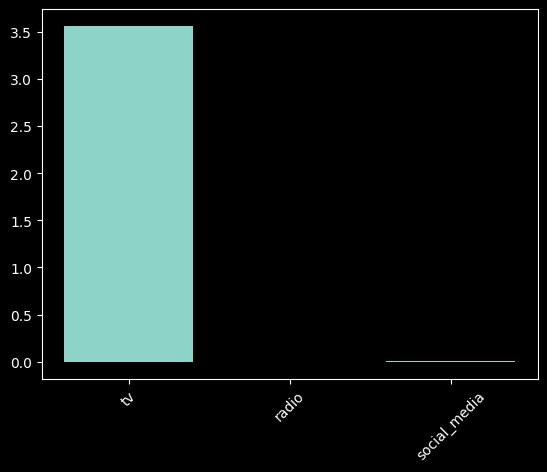

In [32]:
# scikit-learn imports used here
from sklearn.linear_model import Lasso

# assign `X` and `y`
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


# instantiate Lasso with `alpha=0.42`: lasso
lasso = Lasso(alpha=0.42)
# fit model
lasso.fit(X_train, y_train)


# compute and print lasso coefficients: lasso_coef
lasso_coef = lasso.coef_
print(lasso_coef)

# define list of columns: sales_cols
sales_cols = list(sales_adver_df.drop('sales', axis=1))
#create barplot from `sales_col` and `lasso_coef` with `.xticks(rotation=45)` and show plot
plt.bar(sales_cols, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# **3. Fine-Tuning**

---

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

# **4. Preprocessing and Pipelines**

---